<a href="https://colab.research.google.com/github/udaygupta8899/Machine-Learning/blob/main/Body_Measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [121]:
df=pd.read_csv("bdims.csv")
df

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0


In [122]:
df.head()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [123]:
features = list(df.columns)[0:len(df.columns)]
print(features)

['bia_di', 'bii_di', 'bit_di', 'che_de', 'che_di', 'elb_di', 'wri_di', 'kne_di', 'ank_di', 'sho_gi', 'che_gi', 'wai_gi', 'nav_gi', 'hip_gi', 'thi_gi', 'bic_gi', 'for_gi', 'kne_gi', 'cal_gi', 'ank_gi', 'wri_gi', 'age', 'wgt', 'hgt', 'sex']


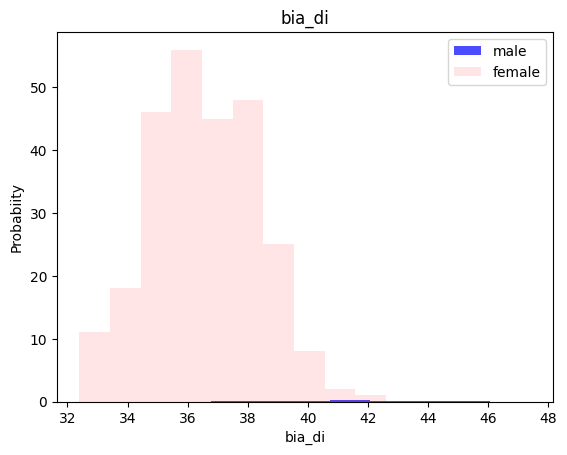

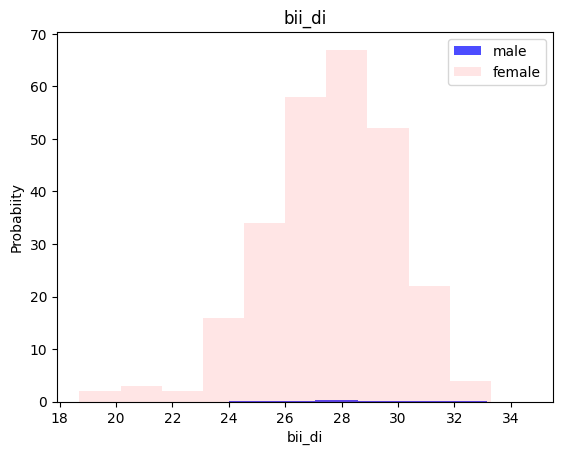

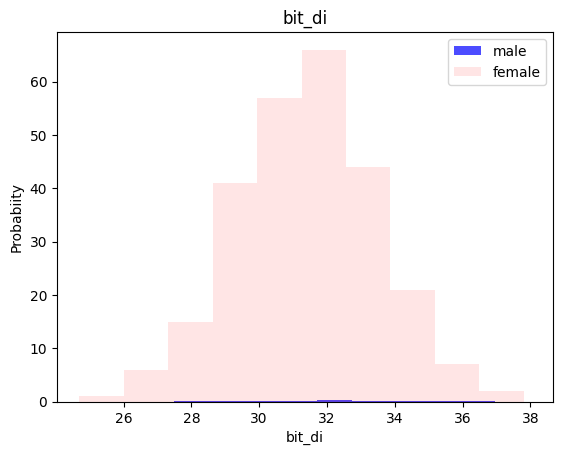

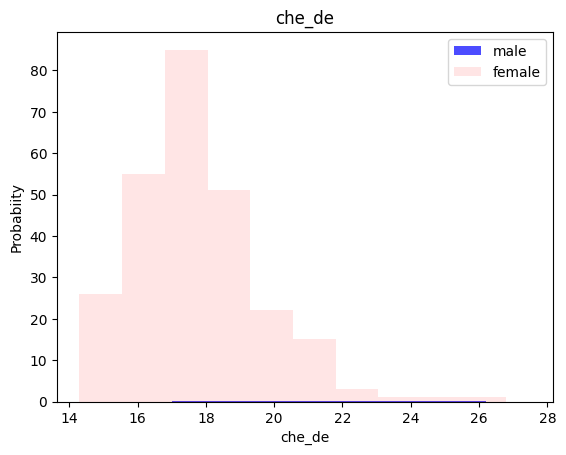

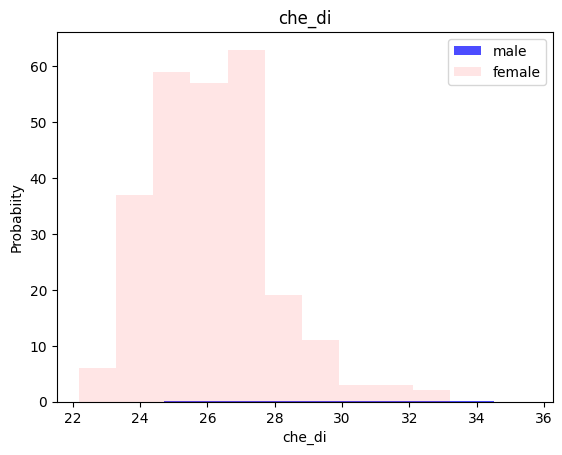

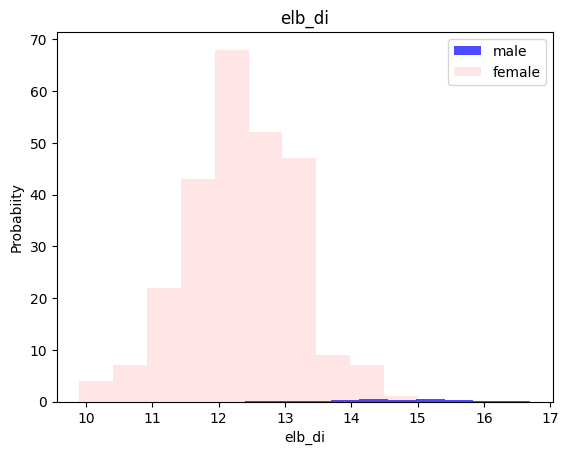

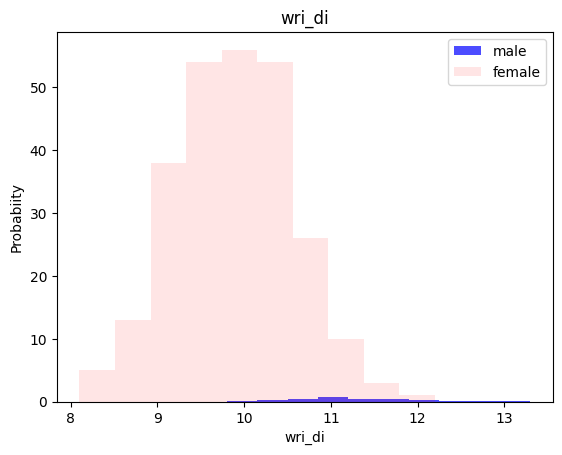

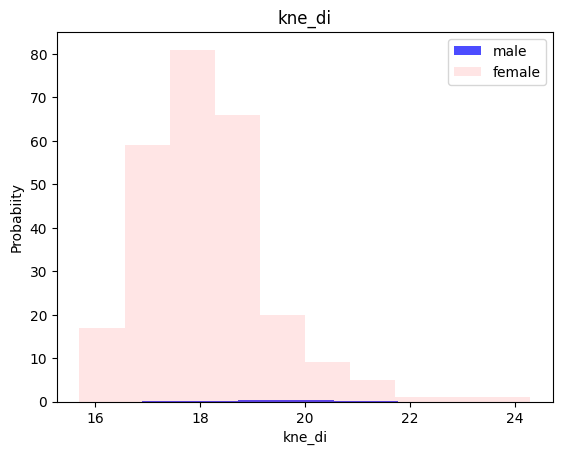

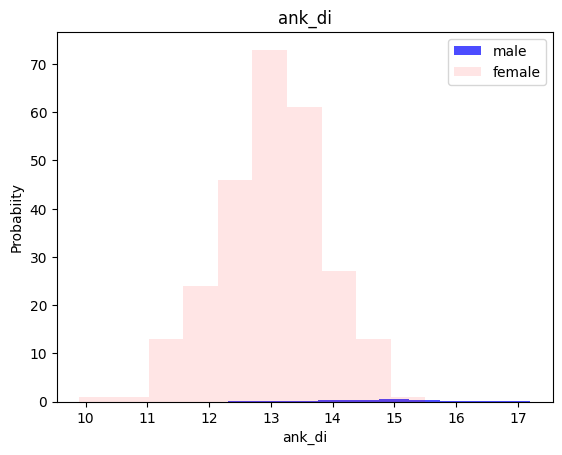

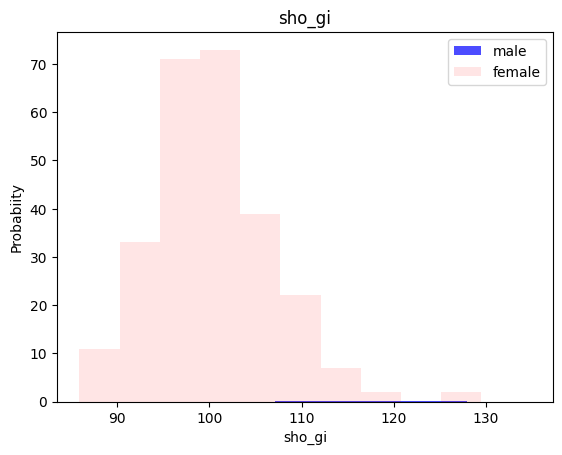

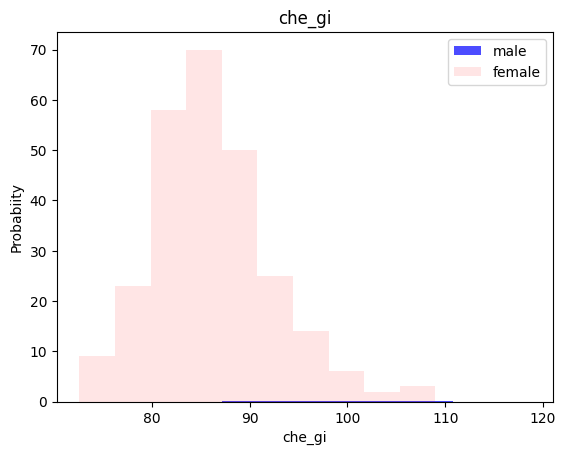

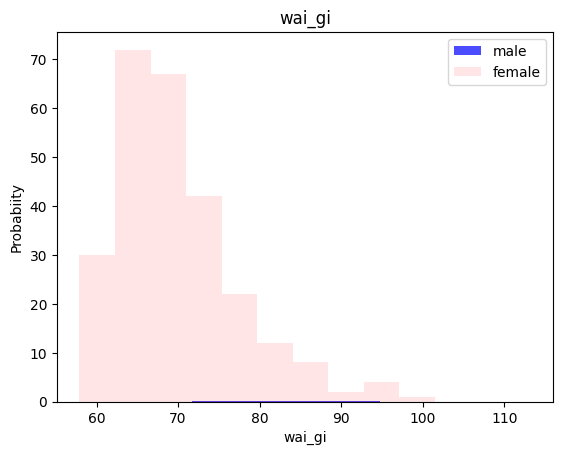

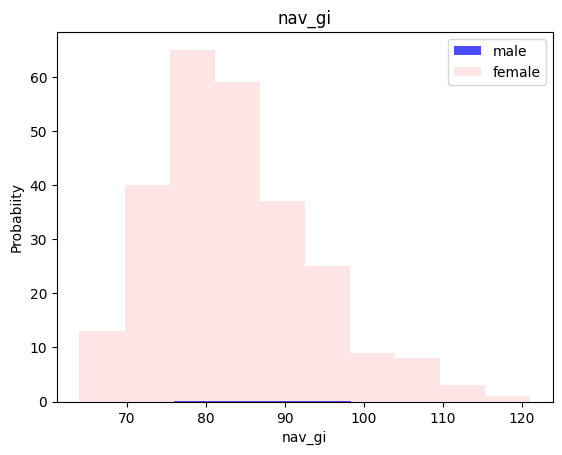

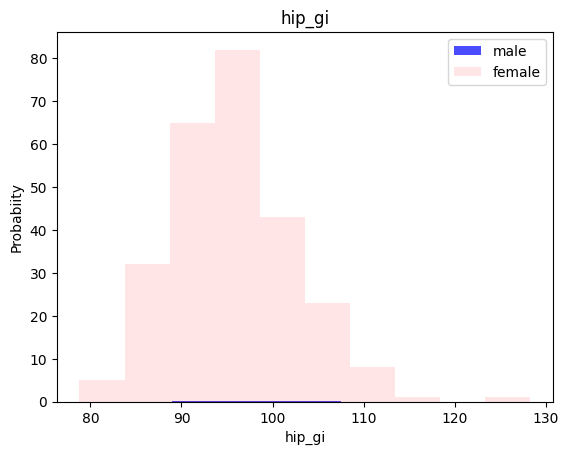

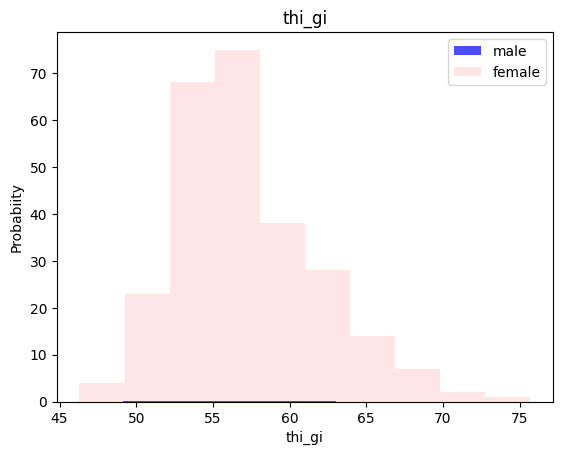

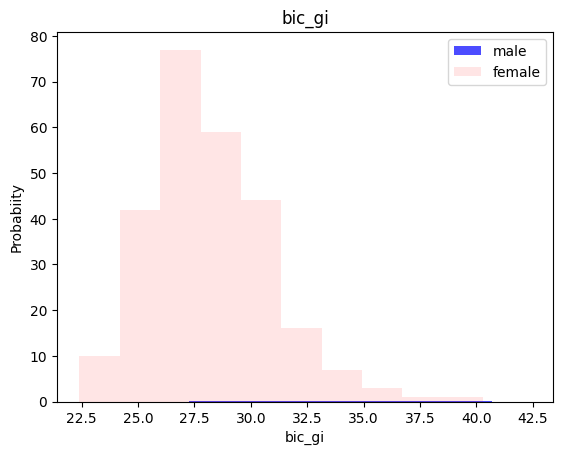

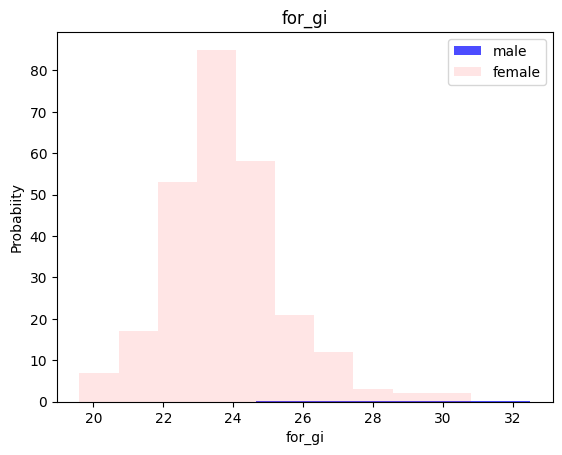

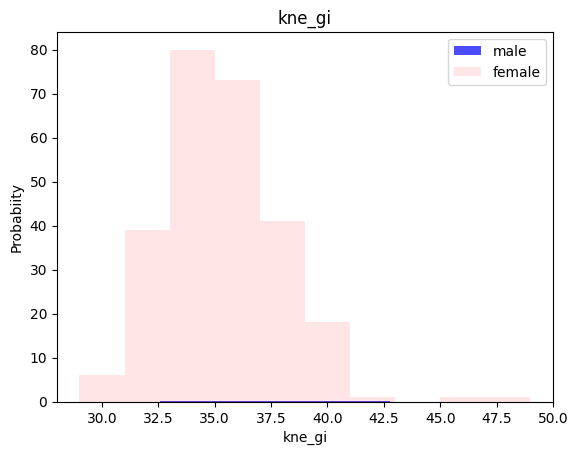

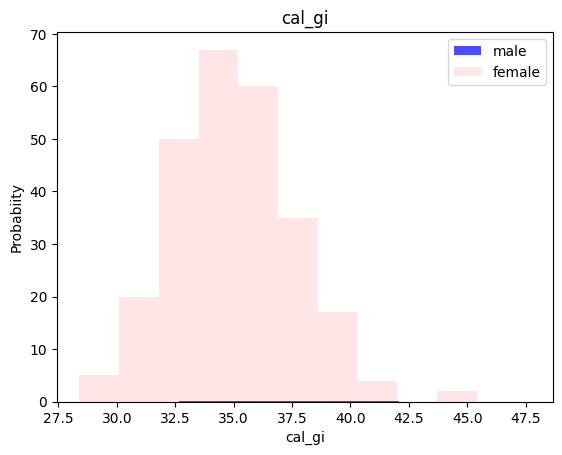

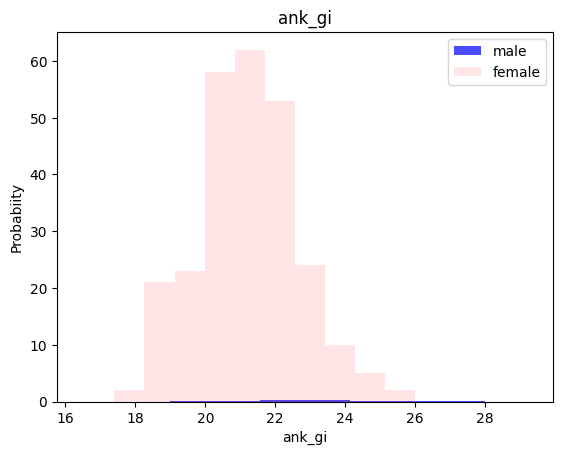

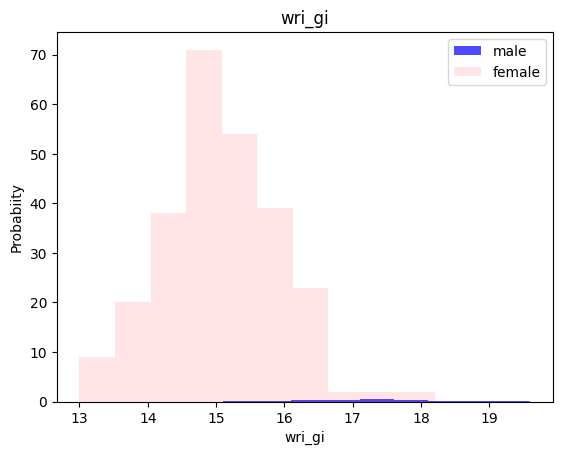

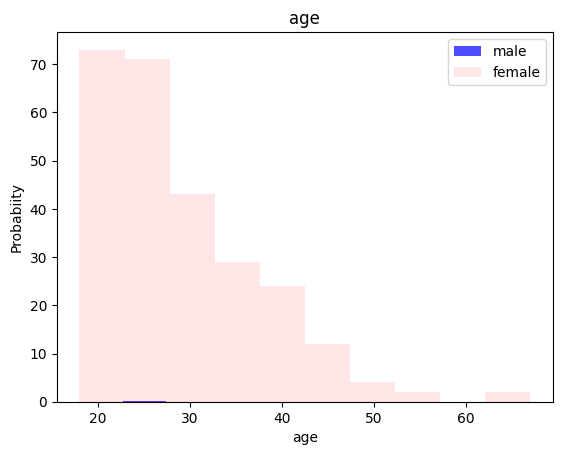

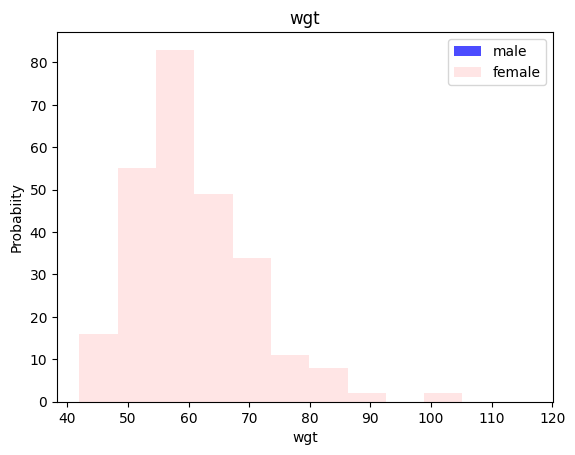

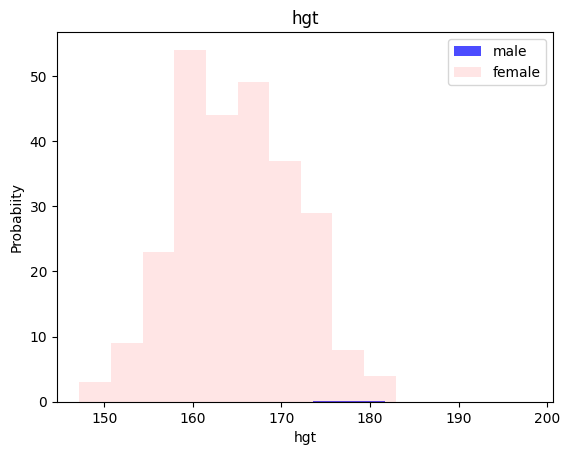

In [124]:
for labels in features[:-1]:
  plt.hist(df[df["sex"] == 1][labels],color="blue",label="male",alpha=0.7, density= True)
  plt.hist(df[df["sex"]==0][labels],color="red",label="female", alpha =0.1, density = False)
  plt.title(labels)
  plt.xlabel(labels)
  plt.ylabel("Probabiity")
  plt.legend()
  plt.show()

In [125]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # Features
y = df['sex']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

print(X_train)
print(y_train)

     bia_di  bii_di  bit_di  che_de  che_di  elb_di  wri_di  kne_di  ank_di  \
404    32.9    26.6    32.2    18.5    25.2    12.0     8.4    19.4    12.0   
350    35.0    25.6    32.5    17.9    27.0    12.6     9.8    18.6    12.9   
368    38.7    27.1    31.4    16.5    27.5    12.8     9.2    18.8    12.5   
411    38.7    30.4    31.3    18.7    26.8    12.4    10.0    19.4    13.6   
306    40.3    29.2    32.9    16.5    26.4    13.0     9.4    18.6    12.9   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
255    37.8    29.0    32.6    18.6    25.0    12.1     9.8    17.8    12.7   
72     42.9    27.5    30.3    18.9    29.6    12.6    10.4    19.2    13.8   
396    38.3    28.3    32.4    18.7    28.3    13.9    10.6    18.9    14.0   
235    38.9    25.6    32.9    21.1    29.0    15.6    10.6    20.2    14.8   
37     38.8    27.2    31.6    18.5    25.5    13.4    10.8    19.0    14.0   

     sho_gi  ...  thi_gi  bic_gi  for_gi  kne_gi  c

KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [127]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [136]:
y_pred=knn_model.predict(X_test)
# plt.plot(X_test,y_test,color='blue')
# plt.plot(X_test,y_pred,color='red')
# plt.show()

In [129]:
print(classification_report(y_test,y_pred))
print(y_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       133
           1       0.97      0.98      0.98       121

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

[0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0]


In [130]:
# prompt: code for getting number of 1 in y_train

import numpy as np
num_ones = np.sum(y_train == 0)
num_zeros =  np.sum(y_train == 1)
print(num_ones,num_zeros)


127 126
